In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import deque
from collections import defaultdict
import networkx as nx
import heapq

## Breadth-First Search (BFS)

`Breadth-First Search is one of the simplest and most fundamental search algorithms in AI. It starts at the initial state and explores all the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level. BFS uses a queue data structure to keep track of the nodes that are yet to be explored. It guarantees the shortest path from the initial state to the goal state if the path cost is a non-decreasing function of the depth of the node.`

__[Reference](https://www.geeksforgeeks.org/uniformed-search-algorithms-in-ai/?ref=next_article)__

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


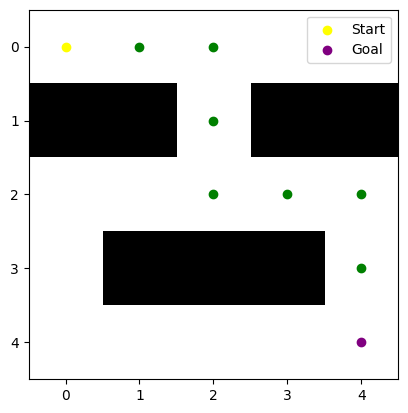

In [20]:
def bfs(maze, start, goal):
    queue = deque([(start, [])])
    visited = set()
    
    while queue:
        current, path = queue.popleft()
        x, y = current
        
        if current == goal:
            return path + [current]
        
        if current in visited:
            continue
        
        visited.add(current)
        
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                queue.append(((nx, ny), path + [current]))
    
    return None

def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.Normalize(bounds[0], bounds[-1])
    
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)
    
    ax.scatter(start[1], start[0], color='yellow', marker='o', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', marker='o', label='Goal')
    
    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='green', marker='o')
    
    ax.legend()
    plt.show()
    
# Example maze
maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = bfs(maze, start, goal)
print(path)

visualize_maze(maze, start, goal, path)    

## Depth-First Search (DFS)

`Depth-First Search is another basic search algorithm in AI. Unlike BFS, DFS explores as far as possible along each branch before backtracking. It uses a stack data structure to keep track of the nodes to be explored. DFS does not guarantee finding the shortest path to the goal node, but it is often more memory-efficient than BFS.`

__[Reference](https://www.geeksforgeeks.org/uniformed-search-algorithms-in-ai/?ref=next_article)__

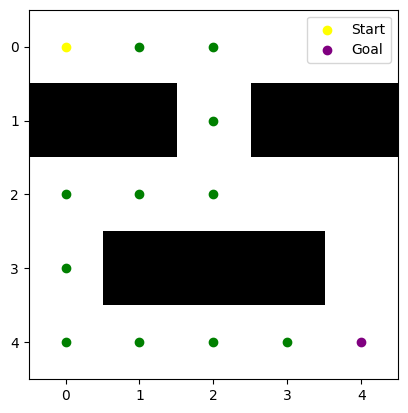

In [21]:
def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.Normalize(bounds[0], bounds[-1])
    
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)
    
    ax.scatter(start[1], start[0], color='yellow', marker='o', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', marker='o', label='Goal')
    
    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='green', marker='o')
    
    ax.legend()
    plt.show()

def dfs(maze, start, goal):
    stack = [(start, [])]
    visited = set()
    
    while stack:
        current, path = stack.pop()
        x, y = current
        
        if current == goal:
            return path + [current]
        
        if current in visited:
            continue
        
        visited.add(current)
        
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                stack.append(((nx, ny), path + [current]))
    
    return None

# Example maze
maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = dfs(maze, start, goal)

visualize_maze(maze, start, goal, path)

## Depth-Limited Search (DLS)

`Depth Limited Search is a modified version of DFS that imposes a limit on the depth of the search. This means that the algorithm will only explore nodes up to a certain depth, effectively preventing it from going down excessively `
`deep paths that are unlikely to lead to the goal. By setting a maximum depth limit, DLS aims to improve efficiency and ensure more manageable search times.`

__[Reference](https://www.geeksforgeeks.org/depth-limited-search-for-ai/)__

Path found: [(0, 0), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4)]


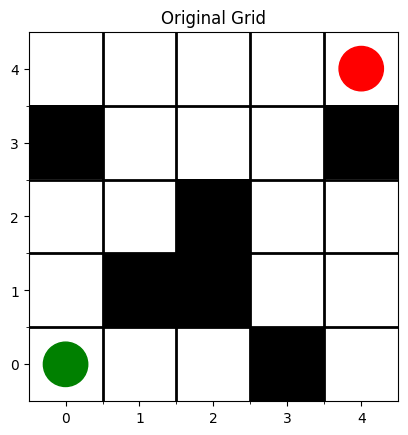

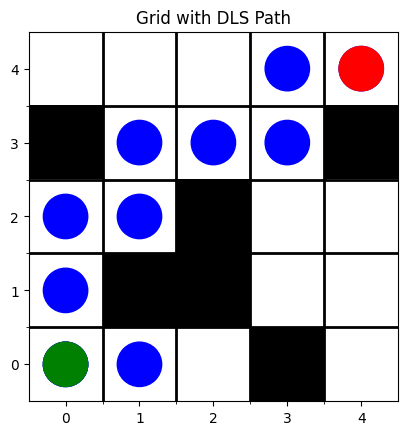

In [28]:
# Define the grid environment with obstacles (1 indicates obstacle, 0 indicates free cell)
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
]

# Define initial and goal positions
initial_position = (0, 0)
goal_position = (4, 4)

# Define problem representation
class Problem:
    def __init__(self, grid, initial, goal):
        self.grid = grid
        self.initial_state = initial
        self.goal_state = goal

    def is_goal(self, state):
        return state == self.goal_state

    def expand(self, state):
        # Define possible movements: up, down, left, right
        movements = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        valid_moves = []
        for move in movements:
            new_x = state[0] + move[0]
            new_y = state[1] + move[1]
            # Check if the new position is within the grid and not an obstacle
            if 0 <= new_x < len(self.grid) and 0 <= new_y < len(self.grid[0]) and self.grid[new_x][new_y] == 0:
                valid_moves.append((new_x, new_y))
        return valid_moves
    
# DLS algorithm
def depth_limited_search(problem, depth_limit):
    return recursive_dls(problem.initial_state, problem, depth_limit)

def recursive_dls(node, problem, depth_limit):
    if problem.is_goal(node):
        return [node]
    elif depth_limit == 0:
        return "cutoff"
    else:
        for child in problem.expand(node):
            result = recursive_dls(child, problem, depth_limit - 1)
            if result == "cutoff":
                continue
            elif result != "failure":
                return [node] + result
        return "failure"
 # Visualization of the original grid if no path found
def visualize_grid(grid):
    fig, ax = plt.subplots()
    
    # Create a grid with the same dimensions
    nrows, ncols = len(grid), len(grid[0])
    ax.set_xticks([x - 0.5 for x in range(1, ncols)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, nrows)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.imshow(grid, cmap='Greys', interpolation='none')
    
    # Highlight initial and goal positions
    ax.add_patch(plt.Circle((initial_position[1], initial_position[0]), radius=0.3, color='green'))
    ax.add_patch(plt.Circle((goal_position[1], goal_position[0]), radius=0.3, color='red'))
    
    plt.gca().invert_yaxis()
    plt.title("Original Grid")
    plt.show()

# Visualization code
def visualize_path(grid, path):
    fig, ax = plt.subplots()
    # Create a grid with the same dimensions
    nrows, ncols = len(grid), len(grid[0])
    ax.set_xticks([x - 0.5 for x in range(1, ncols)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, nrows)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.imshow(grid, cmap='Greys', interpolation='none')
    
    # Highlight the path
    if path:
        for (x, y) in path:
            ax.add_patch(plt.Circle((y, x), radius=0.3, color='blue'))
    
    # Highlight initial and goal positions
    ax.add_patch(plt.Circle((initial_position[1], initial_position[0]), radius=0.3, color='green'))
    ax.add_patch(plt.Circle((goal_position[1], goal_position[0]), radius=0.3, color='red'))
    
    plt.gca().invert_yaxis()
    plt.title("Grid with DLS Path")
    plt.show()

    
    
# Create problem instance
problem = Problem(grid, initial_position, goal_position)

# Find path using DLS with depth limit 10
depth_limit = 10
path = depth_limited_search(problem, depth_limit)

# Output path
if path == "failure":
    print("No path found within the depth limit.")
elif path == "cutoff":
    print("Search terminated due to depth limit.")
else:
    print("Path found:", path)    

visualize_grid(grid)   
visualize_path(grid, path)

## Iterative Deepening Depth-First Search (IDDFS)

`Iterative Deepening Depth-First Search is a combination of BFS and DFS. It repeatedly applies DFS with increasing depth limits until the goal node is found. IDDFS combines the benefits of BFS (guaranteed shortest path) and DFS (less memory consumption) by gradually increasing the depth limit.`

__[Reference](https://www.geeksforgeeks.org/iterative-deepening-searchids-iterative-deepening-depth-first-searchiddfs/)__

In [34]:
# This class represents a directed graph using adjacency
# list representation
class Graph:

    def __init__(self,vertices):

        # No. of vertices
        self.V = vertices

        # default dictionary to store graph
        self.graph = defaultdict(list)

    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)

    # A function to perform a Depth-Limited search
    # from given source 'src'
    def DLS(self,src,target,maxDepth):

        if src == target : return True

        # If reached the maximum depth, stop recursing.
        if maxDepth <= 0 : return False

        # Recur for all the vertices adjacent to this vertex
        for i in self.graph[src]:
                if(self.DLS(i,target,maxDepth-1)):
                    return True
        return False

    # IDDFS to search if target is reachable from v.
    # It uses recursive DLS()
    def IDDFS(self,src, target, maxDepth):

        # Repeatedly depth-limit search till the
        # maximum depth
        for i in range(maxDepth):
            if (self.DLS(src, target, i)):
                return True
        return False
    
 # Create a graph given in the above diagram
g = Graph (10);
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(1, 4)
g.addEdge(2, 5)
g.addEdge(2, 6)
g.addEdge(3, 7)
g.addEdge(3, 8)
g.addEdge(3, 9)

target = 9; maxDepth = 3; src = 0

if g.IDDFS(src, target, maxDepth) == True:
    print ("Target is reachable from source " +
        "within max depth")
else :
    print ("Target is NOT reachable from source " +
        "within max depth")   

Target is NOT reachable from source within max depth


## Uniform-Cost Search (UCS)

`Uniform-Cost Search is a variant of BFS where the cost of the path is taken into account. It explores the node with the lowest path cost first. UCS guarantees finding the optimal path to the goal node when the path cost is non-negative.
Uniform-cost search (UCS) is a tree or graph search algorithm used in artificial intelligence that finds the least cost path from a given initial node to a goal node. It's useful in situations where paths have different costs associated with them. UCS expands the least costly node first, ensuring that when it reaches a goal node, it has found the least cost path to that node.`

__[Reference](https://www.geeksforgeeks.org/uniform-cost-search-dijkstra-for-large-graphs/)__

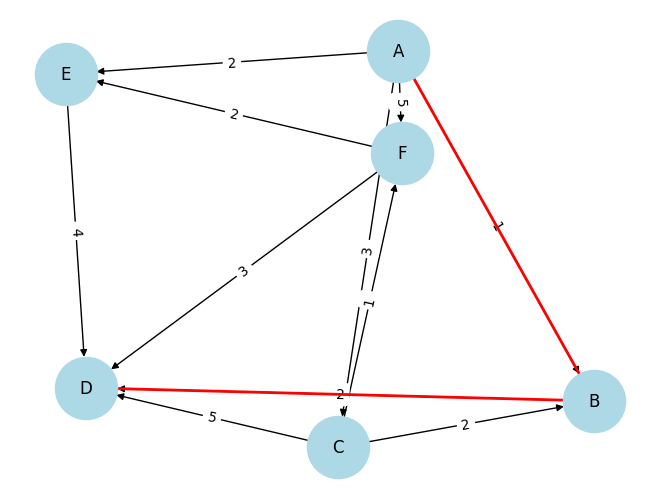

Path from A to D : ['A', 'B', 'D']


In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def __lt__(self, other):
        return self.path_cost < other.path_cost

def uniform_cost_search(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, Node(start))
    explored = set()
    path = []
    
    while frontier:
        node = heapq.heappop(frontier)
        
        if node.state == goal:
            path = reconstruct_path(node)
            break
        
        explored.add(node.state)
        
        for (cost, result_state) in graph[node.state]:
            if result_state not in explored:
                child_cost = node.path_cost + cost
                child_node = Node(result_state, node, None, child_cost)
                if not any(frontier_node.state == result_state and 
                           frontier_node.path_cost <= child_cost for frontier_node in frontier):
                    heapq.heappush(frontier, child_node)
                    
    return path

def reconstruct_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]

def visualize_graph(graph, path=None):
    G = nx.DiGraph()
    labels = {}
    for node, edges in graph.items():
        for cost, child_node in edges:
            G.add_edge(node, child_node, weight=cost)
            labels[(node, child_node)] = cost
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    plt.show()

# Define the graph
graph = {
    'A': [(1, 'B'), (3, 'C'),(2,'E'),(5,'F')],
    'B': [(2, 'D')],
    'C': [(5, 'D'), (2, 'B'), (1,'F')],
    'E': [(4,'D')],
    'F': [(2,'E'), (3,'D')],
    'D': []
}

start = 'A'
goal = 'D'
path = uniform_cost_search(graph, start, goal)

visualize_graph(graph, path)
print("Path from", start, "to", goal, ":", path)
